# **FREE GPU ON GOOGLE COLABORATORY**

## How to use free GPU for model training

---


Go to Edit -> Notebook Settings and choose GPU from the Hardware Accelerator dropbox.

## Test GPU:

In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'



---


### Error: "Failed to assign a backend"
Keep trying, this error is due to high GPU demmand.


---




### Get GPU specifications:

In [0]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 1635475229951282166, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11287966516
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 10140766486774792869
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

## Open local files:

In [0]:
## Select from your local file system:
from google.colab import files
uploaded = files.upload()

In [0]:
## Open uploaded dataset
import pandas as pd
import io
df_local = pd.read_csv(io.StringIO(uploaded['gender_submission.csv'].decode('utf-8')))
df_local.head(5)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## Open from Google Drive:

Click on the given link, this will ask for your google account credentials to use Google Cloud SDK, aprove the requested permissions, and then copy the code and paste it in the verification code box below. It will ask you to perform these actions twice.

In [0]:
## Install necessary libraries to perform authorization:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
## Mount Google Drive
!mkdir -p drive
!google-drive-ocamlfuse drive

In [0]:
## Open dataset
import pandas as pd
df_drive = pd.read_csv("drive/Google colab Notebooks/gender_submission.csv")
df_drive.head(5)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## Download Dataset from URL:

In [0]:
!wget https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/Titanic.csv -P "drive/Google colab Notebooks"

--2018-05-07 18:07:46--  https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/Titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1170 (1.1K) [text/plain]
Saving to: ‘drive/Google colab Notebooks/Titanic.csv’

Titanic.csv         100%[===================>]   1.14K  --.-KB/s    in 0s      

2018-05-07 18:07:48 (28.6 MB/s) - ‘drive/Google colab Notebooks/Titanic.csv’ saved [1170/1170]



#Working examples:

## Linear regression:

In [0]:
## Import libraries:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
## Import dataset from Google Drive:
dataset = pd.read_csv("drive/Google colab Notebooks/Salary_Data.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
dataset.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [0]:
## Create training set & test set
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

In [0]:
## Fit linear regressor with training data
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor = regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test) 

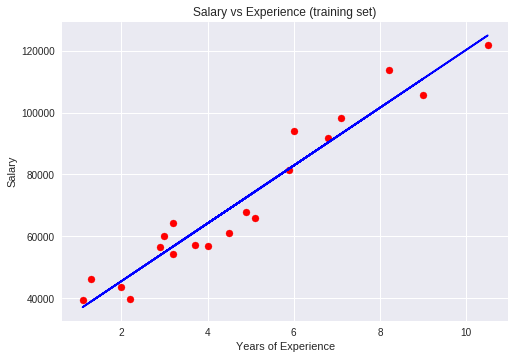

In [0]:
## plotting training set results
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

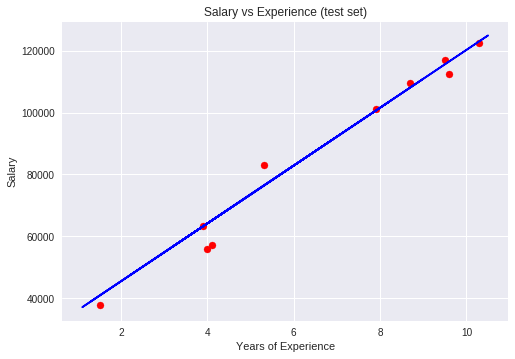

In [0]:
## plotting test set results
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Simple neural network with Tensorflow:

### Clone repo from github:

In [0]:
!git clone https://github.com/Hvass-Labs/TensorFlow-Tutorials.git "drive/Google colab Notebooks/keras-mnist-tutorial"

Cloning into 'drive/Google colab Notebooks/keras-mnist-tutorial'...
remote: Counting objects: 418, done.
remote: Total 418 (delta 0), reused 0 (delta 0), pack-reused 418
Receiving objects: 100% (418/418), 60.73 MiB | 227.00 KiB/s, done.
Resolving deltas: 100% (191/191), done.
Checking out files: 100% (123/123), done.
